

# Project: TMDB Movie Data Investigating 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.And it contains 21 columns and 10866 rows.
### Questions:
<p>1-Which year has the most movie voting </p>
<p>2-Which year has the most movies releases </p>
<p>3-which year has the most average movies revenue </p>
<p>4-What are the top 10 movies by revenue </p>
<p>5-What are the top 10 movies by votes count </p>
<p>6-What are the top 10 movies by runtime duration </p>
<p>7-What are the top 10 movies by budget </p>
<p>8-What are the top 10 movies by popularity </p>
<p>9-What are the top 10 lowest movies by votes average </p>
<p>10-Is there is correlation between popularity and revenue </p>
<p>11-Who are the most popular directors </p>
<p>12-What are the most popular movie genres</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties
Loading the csv file and displaying general data overview

In [2]:
tmdb=pd.read_csv("tmdb-movies.csv")
tmdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
tmdb.shape

(10866, 21)

In [5]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This table describes the statistics for each columns in this dataset




# Data Cleaning 


<p>*Checking and dropping NAN values</p>
<p>*Checking and dropping duplicated values</p>
<p>*Dropping unwanted columns in this invistgation</p>

## >Checking and dropping NAN values

In [6]:
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
tmdb.fillna(0,inplace=True)

In [8]:
tmdb.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

## >Checking and dropping duplicated values 

In [9]:
tmdb.duplicated().sum()

1

In [10]:
tmdb.drop_duplicates(inplace=True)

## >Dropping unwanted columns in this invistgation 

In [11]:
tmdb.drop(['homepage','cast','tagline','overview','production_companies'],axis=1,inplace=True)
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   imdb_id         10865 non-null  object 
 2   popularity      10865 non-null  float64
 3   budget          10865 non-null  int64  
 4   revenue         10865 non-null  int64  
 5   original_title  10865 non-null  object 
 6   director        10865 non-null  object 
 7   keywords        10865 non-null  object 
 8   runtime         10865 non-null  int64  
 9   genres          10865 non-null  object 
 10  release_date    10865 non-null  object 
 11  vote_count      10865 non-null  int64  
 12  vote_average    10865 non-null  float64
 13  release_year    10865 non-null  int64  
 14  budget_adj      10865 non-null  float64
 15  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


<a id='eda'></a>
# Exploratory Data Analysis



## (Research Question 1):  Which year has the most movie voting

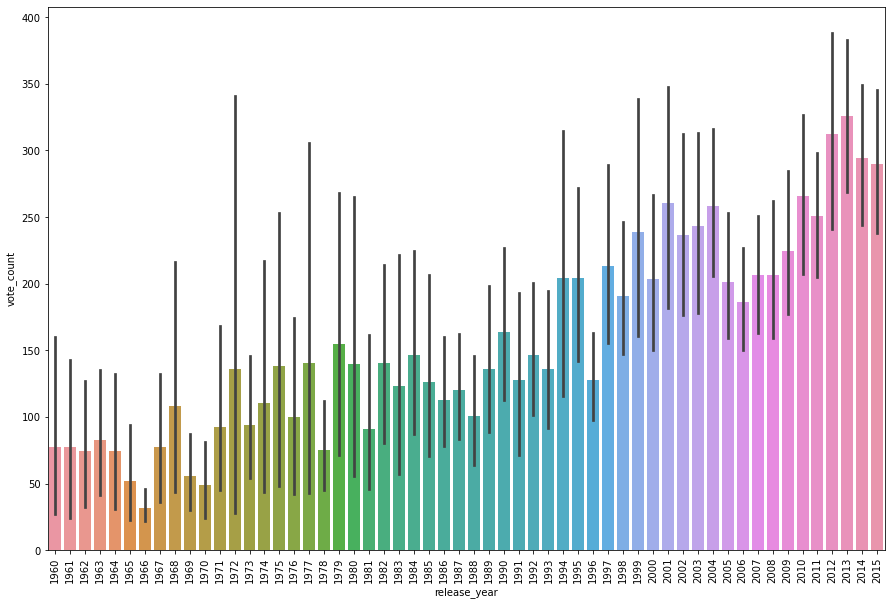

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(x='release_year',y='vote_count',data=tmdb);
plt.xticks(rotation=90);

The charts above shows each year movies voting and the year with the most movies votes is 2013 then 2012 then 2014

# (Research Question 2): Which year has the most movies releases

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


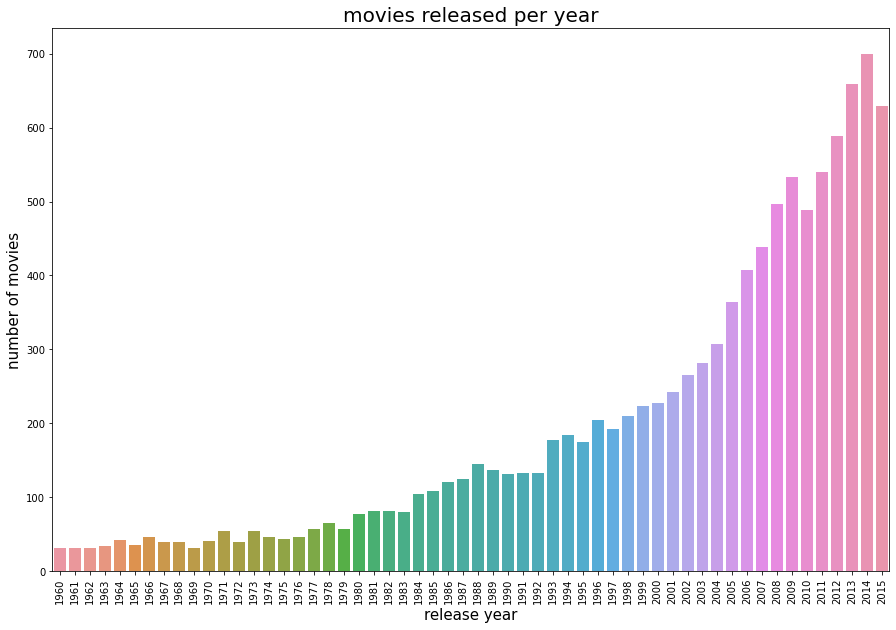

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


In [13]:
plt.figure(figsize=(15,10))
sns.countplot(tmdb['release_year']);
plt.title('movies released per year',fontsize = 20)
plt.xlabel('release year',fontsize = 15)
plt.ylabel('number of movies',fontsize = 15)
plt.xticks(rotation=90)
plt.show()
most_releasesY=tmdb.groupby('release_year').count()['id']
print(most_releasesY.tail())

The charts above shows every year movies releases and the highest movie releases year is 2014 (700 movies) then 2013 (659 movies) then 2015 (629 movies)

# (Research Question 3): which year has the most average movies revenue

In [14]:
tmdb.groupby('release_year')['revenue'].mean().sort_values(ascending=False)

release_year
1997    5.549569e+07
2001    5.541357e+07
2002    5.505120e+07
2004    5.470301e+07
2003    5.387275e+07
1995    5.232195e+07
1999    5.069515e+07
2000    4.836432e+07
1992    4.570040e+07
2005    4.537592e+07
1998    4.520559e+07
2010    4.490599e+07
2007    4.431888e+07
2011    4.388073e+07
2015    4.254762e+07
2012    4.195311e+07
2009    4.161383e+07
1996    4.074261e+07
1990    4.026641e+07
2006    3.989152e+07
2008    3.917680e+07
1993    3.907388e+07
1994    3.856212e+07
1977    3.825584e+07
1989    3.770017e+07
2013    3.748654e+07
1991    3.538797e+07
2014    3.475879e+07
1982    3.035116e+07
1979    2.955781e+07
1983    2.884412e+07
1987    2.769684e+07
1985    2.638323e+07
1988    2.579001e+07
1984    2.510023e+07
1986    2.481635e+07
1980    2.267516e+07
1973    2.225420e+07
1975    2.176114e+07
1981    2.164154e+07
1978    2.107353e+07
1967    1.844587e+07
1974    1.728808e+07
1976    1.704267e+07
1970    1.366395e+07
1965    1.308805e+07
1972    1.236825e+07


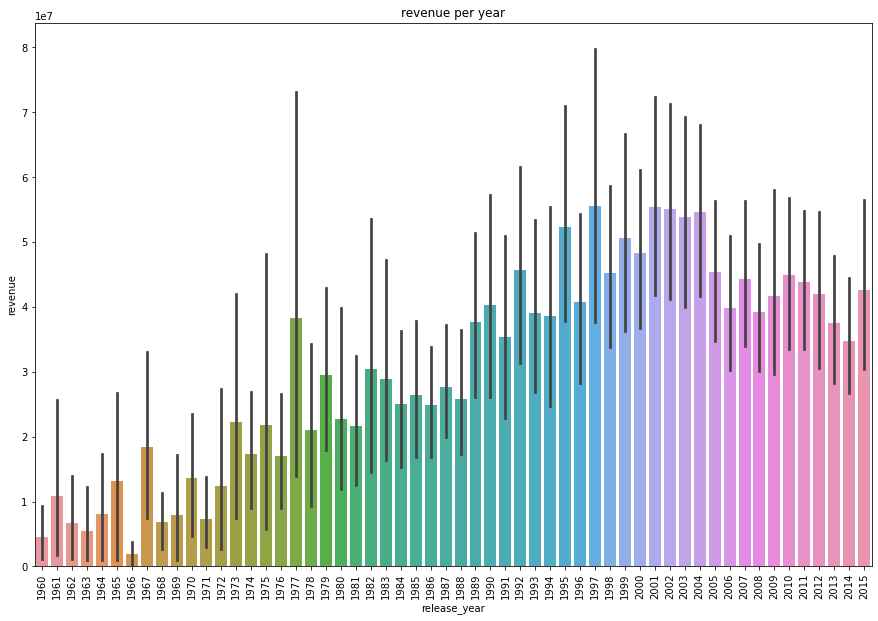

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x='release_year',y='revenue',data=tmdb);
plt.title('revenue per year')
plt.xticks(rotation=90);

The charts above shows every year movies revenue and the highest revenue year is 1997 then 2001 then 2002

# (Research Question 4): What are the top 10 movies by revenue

In [16]:
top10revenue=tmdb.nlargest(10,'revenue')[['original_title','revenue']].set_index('original_title')
top10revenue

,revenue
original_title,
Avatar,2781505847
Star Wars: The Force Awakens,2068178225
Titanic,1845034188
The Avengers,1519557910
Jurassic World,1513528810
Furious 7,1506249360
Avengers: Age of Ultron,1405035767
Harry Potter and the Deathly Hallows: Part 2,1327817822
Frozen,1274219009


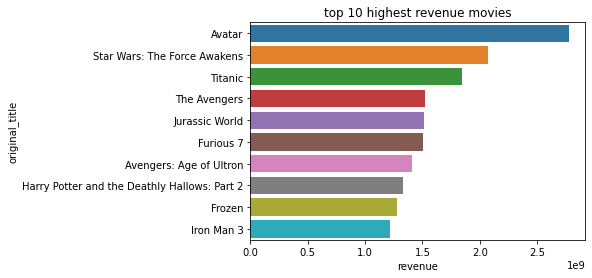

In [17]:
sns.barplot(x='revenue',y=top10revenue.index,data=top10revenue);
plt.title('top 10 highest revenue movies');

The charts above shows the the top 10 highest revenue movies and the top 3 are Avatar (total earnings 2.781.505.847 USD) ,
Star Wars : The Force Awakens (total earnings 2.068.178.225 USD ) , Titanic (total earnings 1.845.034.188 USD )

# (Research Question 5): What are the top 10 movies by votes count

In [18]:
top10rating=tmdb.nlargest(10,'vote_count')[['original_title','vote_count']].set_index('original_title')
top10rating

,vote_count
original_title,
Inception,9767
The Avengers,8903
Avatar,8458
The Dark Knight,8432
Django Unchained,7375
The Hunger Games,7080
Iron Man 3,6882
The Dark Knight Rises,6723
Interstellar,6498


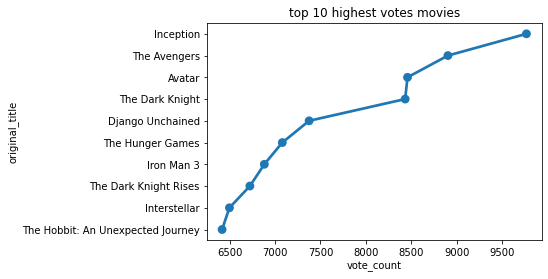

In [19]:
sns.pointplot(x='vote_count',y=top10rating.index,data=top10rating);
plt.title('top 10 highest votes movies');

The charts above shows the the top 10 highest movies by votes count and the top 3 are Inception (9767 votes), The Avengers (8903 votes) , Avatar (8458 votes) .

#  (Research Question 6): What are the top 10 movies by runtime duration

In [20]:
top10runtime=tmdb.nlargest(10,'runtime')[['original_title','runtime']].set_index('original_title')
top10runtime

,runtime
original_title,
The Story of Film: An Odyssey,900
Taken,877
Band of Brothers,705
Shoah,566
"North and South, Book I",561
Planet Earth,550
The Pacific,540
John Adams,501
Life,500


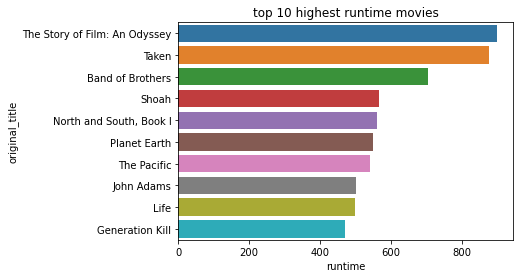

In [21]:
sns.barplot(x='runtime',y=top10runtime.index,data=top10runtime);
plt.title('top 10 highest runtime movies');

The charts above shows the the top 10 highest runtimes movies and the top 3 are The Story of Film: An Odyssey  with a runtime of 900 minutes (about 15 hours) , Taken with a runtime of 877 minutes (14 hours and 37 minutes) , Band of Brothers with a runtime of 705 minutes(11 hours and 45 minutes).

#  (Research Question 7): What are the top 10 movies by budget 

In [22]:
top10budget=tmdb.nlargest(10,'budget')[['original_title','budget']].set_index('original_title')
top10budget

,budget
original_title,
The Warrior's Way,425000000
Pirates of the Caribbean: On Stranger Tides,380000000
Pirates of the Caribbean: At World's End,300000000
Avengers: Age of Ultron,280000000
Superman Returns,270000000
Tangled,260000000
John Carter,260000000
Spider-Man 3,258000000
The Lone Ranger,255000000


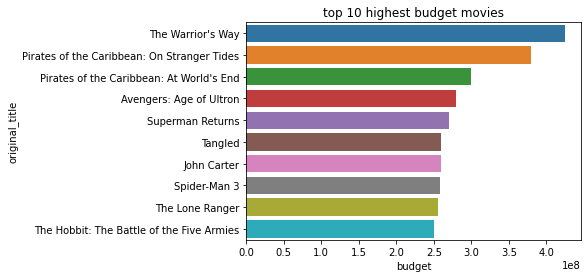

In [23]:
sns.barplot(x='budget',y=top10budget.index,data=top10budget);
plt.title('top 10 highest budget movies');

The charts above shows the the top 10 highest budget movies and the top 3 are The Warrior's Way , Pirates of the Caribbean: On Stranger Tides , Pirates of the Caribbean: At World's End .

#  (Research Question 8): What are the top 10 movies by popularity

In [24]:
top10popularity=tmdb.nlargest(10,'popularity')[['original_title','popularity']].set_index('original_title')
top10popularity

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507
Captain America: The Winter Soldier,12.971027
Star Wars,12.037933
John Wick,11.422751
Star Wars: The Force Awakens,11.173104


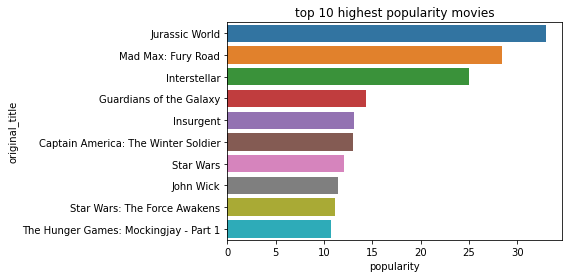

In [25]:
sns.barplot(x='popularity',y=top10popularity.index,data=top10popularity);
plt.title('top 10 highest popularity movies');

The charts above shows the the top 10 highest popularity movies and the top 3 are Jurassic World , Mad Max: Fury Road , Interstellar.

# (Research Question 9): What are the top 10 lowest movies by votes average

In [26]:
top10low_vote=tmdb.nsmallest(10,'vote_average')[['original_title','vote_average']].set_index('original_title')
top10low_vote

,vote_average
original_title,
Transmorphers,1.5
Manos: The Hands of Fate,1.5
Jurassic Shark,2.0
Birdemic: Shock and Terror,2.1
Sand Sharks,2.1
Superbabies: Baby Geniuses 2,2.1
Foodfight!,2.2
The Sleeper,2.2
Atlantic Rim,2.2


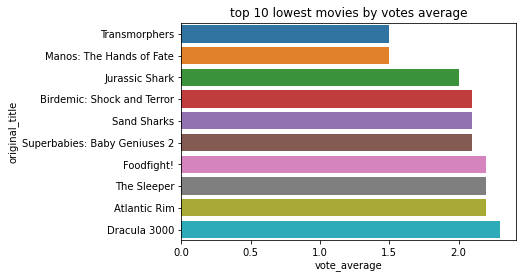

In [27]:
sns.barplot(x='vote_average',y=top10low_vote.index,data=top10low_vote);
plt.title('top 10 lowest movies by votes average');

The charts above shows the the lowest movies by votes average and the lowest 3 are Transmorphers , Manos: The Hands of Fate ,Jurassic Shark.

#  (Research Question 10): Is there is correlation between popularity and revenue?

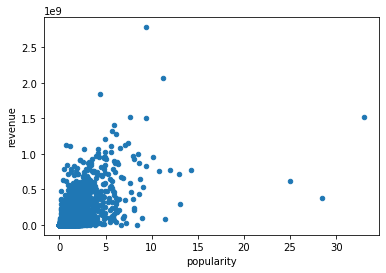

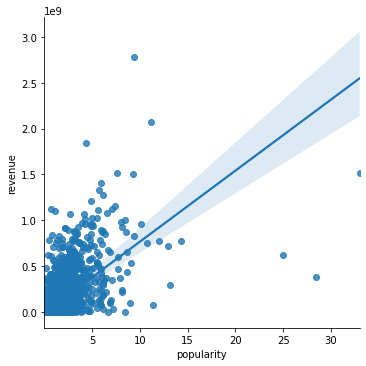

In [28]:
tmdb.plot.scatter(x = 'popularity', y = 'revenue');
sns.lmplot(x = 'popularity', y = 'revenue',data=tmdb);

There is postive correlation between revenue and popularity which mean when the more revenue means more popularity for the movie

# (Research Question 11): Who are the most popular directors

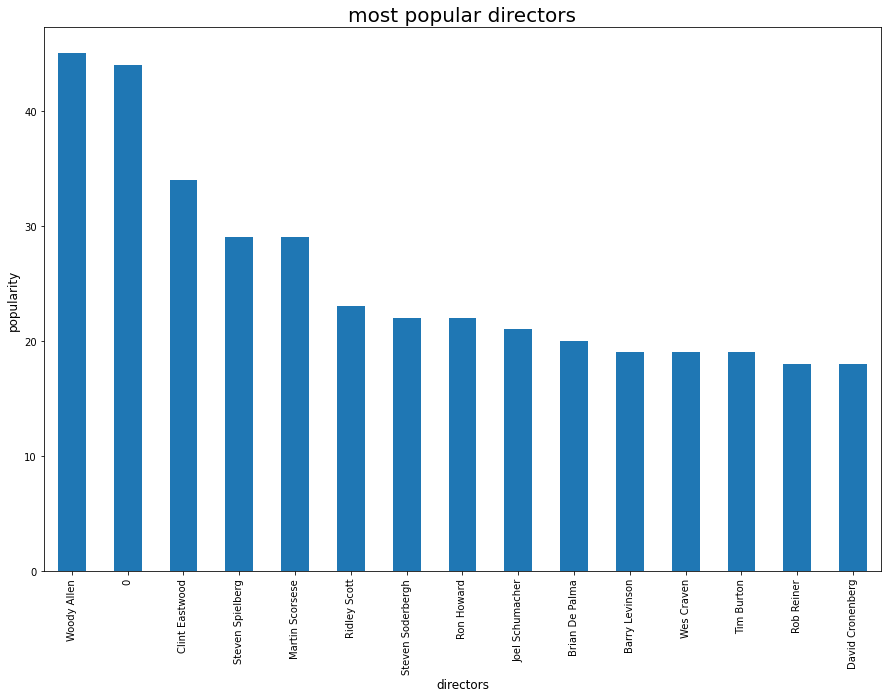

In [29]:
tmdb['director'].value_counts().head(15).plot.bar(figsize=(15,10));
plt.xlabel('directors',fontsize=12);
plt.ylabel('popularity',fontsize=12);
plt.title('most popular directors',fontsize=20);

The charts above shows the most popular directors and the top 3 are Woody Allen , Clint Eastwood , Martin Scorsese.

# (Research Question 11): What are the most popular movie genres

In [30]:
tmdb["genres"] = tmdb["genres"].astype(str)
def data(genres):
    data_plot = tmdb[genres].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

total_keywords = data('genres')
print(total_keywords)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
0                    23
dtype: int64


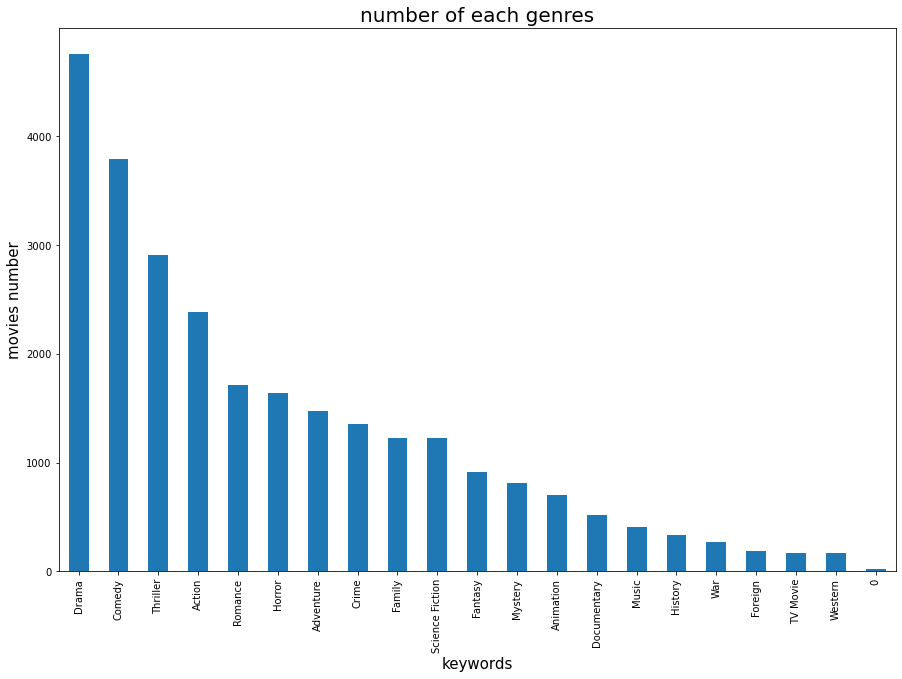

In [31]:
total_keywords.plot(kind='bar',figsize=(15,10));
plt.xlabel('keywords',fontsize=15);
plt.ylabel('movies number',fontsize=15);
plt.title('number of each genres',fontsize=20);

As we can see from the graph above that the most popular genres is Drama (4761 movies), Comedy  (3793 movies) , Thriller (2908 movies)

<a id='conclusions'></a>
# Conclusions


<p>After analyzing some aspects of the dataset I have find out the following facts:</p>

<p>1-The year with the most movies votes is 2013 .</p>
<p>2-The highest movie releases year is 2014 .</p>
<p>3-The highest revenue year is 1997 .</p>
<p>4-The highest revenue movie is Avatar (total earnings 2.781.505.847$) .</p>
<p>5-The highest movie by votes count is Inception .</p>
<p>6-The highest runtime movie is The Story of Film: An Odyssey .</p>
<p>7-The highest budget movie is The Warrior's Way .</p>
<p>8-The highest popularity movie is Jurassic World .</p>
<p>9-The lowest movie by votes average is Transmorphers .</p>
<p>10-There is postive correlation between popularity and revenue </p>
<p>11-most popular director is Woody Allen </p>
<p>12-the most popular genres is Drama (4761 movies)</p>

### Data limitation
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),And it contains 21 columns and 10866 rows.However during the analysis I found some NAN values so i replaced them with 0 values as removing them will affect the quality of this analysis ,also I have found some dublicated data so i dropped it to mentain the quality of the analysis,after dropping the unwanted columns the dataset became ready to invistgation.In this invistgation I covered alot of questions that answers some frequent general question and the correlation between some aspects in this dataset.